In [2]:
#import lib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
mpl.style.use('seaborn-dark')

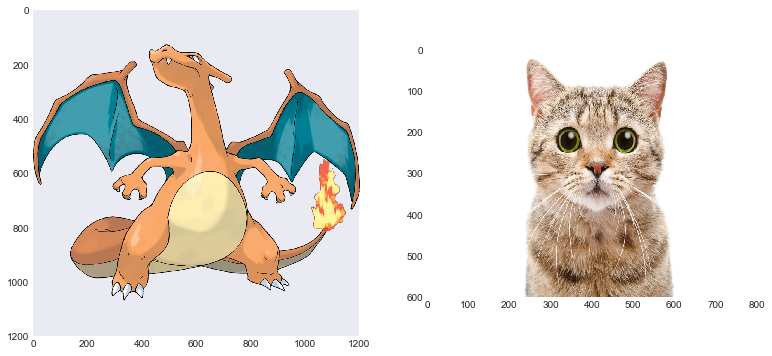

In [3]:
#import img
img1 = plt.imread('charizard.png')
img2 = plt.imread('cat.jpg')/255
fig, [ax1,ax2] = plt.subplots(ncols=2, figsize=(13,6))
ax1.imshow(img1)
ax2.imshow(img2)
plt.show()

In [4]:
#pixelate, m = width of new image
def shrink(img,m):
    x = int(img.shape[1]//m)
    n = int(img.shape[0]//x)

    df = []
    for l in range(3):
        layer = img[:,:,l]
        row = []
        for i in range(n):
            for j in range(m):
                v = np.mean(layer[i*x:(i+1)*x-1,j*x:(j+1)*x-1])
                row.append(v)
        df.append(row)
    df = pd.DataFrame(np.array(df).T, columns=['r','g','b'])
    return df, n, x

def color_k(df, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    return kmeans.labels_, kmeans.cluster_centers_

In [5]:
def pixelate(img, m, k):
    df, n, x = shrink(img,m)
    y, colors = color_k(df,k)
    new_img = np.zeros([n,m,3])
    c = 0
    for i in range(n):
        for j in range(m):
            new_img[i][j] = colors[y[c]]
            c += 1
    return new_img,x, n, m, k

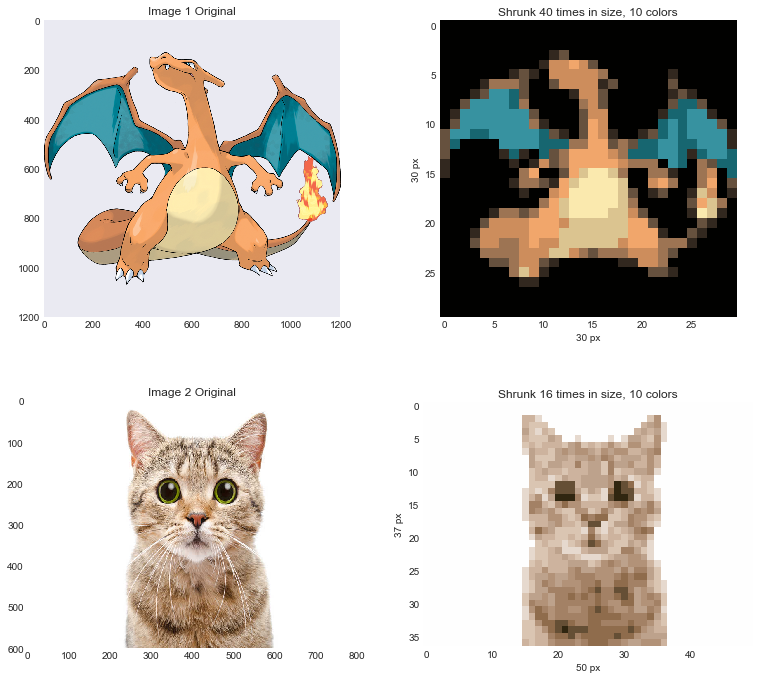

In [6]:
pix1, x1, n1, m1, k1 = pixelate(img1, 30, 10)
pix2, x2, n2, m2, k2 = pixelate(img2, 50, 10)
fig, [[ax3, ax1], [ax4,ax2]] = plt.subplots(nrows=2, ncols=2, figsize=(13,12))
ax1.imshow(pix1)
ax1.set_title('Shrunk {} times in size, {} colors'.format(x1,k1))
ax1.set_xlabel('{} px'.format(m1))
ax1.set_ylabel('{} px'.format(n1))
ax2.imshow(pix2)
ax2.set_title('Shrunk {} times in size, {} colors'.format(x2,k2))
ax2.set_xlabel('{} px'.format(m2))
ax2.set_ylabel('{} px'.format(n2))
ax3.imshow(img1)
ax3.set_title('Image 1 Original')
ax4.imshow(img2)
ax4.set_title('Image 2 Original')
plt.show()

In [7]:
img1 = plt.imread('doggo.png')
img2 = plt.imread('corgi.jpg')/255

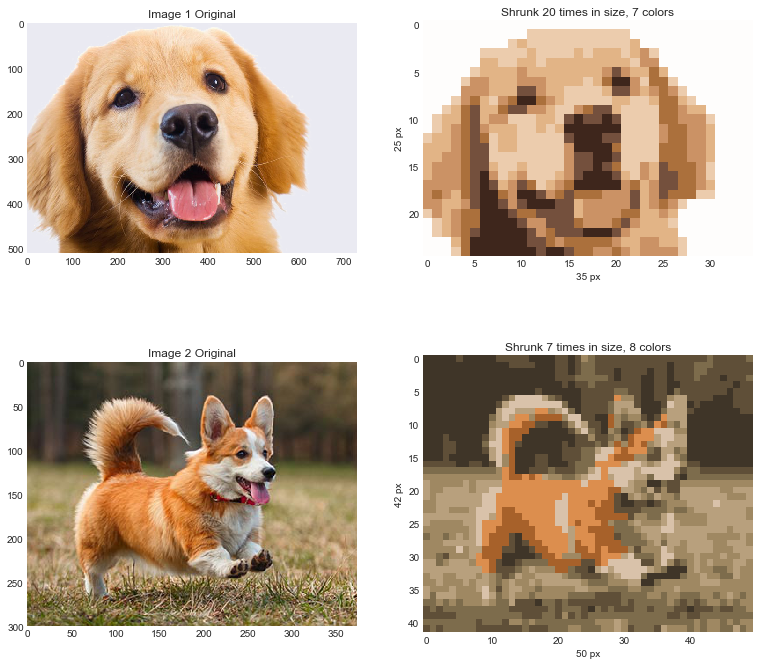

In [10]:
pix1, x1, n1, m1, k1 = pixelate(img1, 35, 7)
pix2, x2, n2, m2, k2 = pixelate(img2, 50, 8)
fig, [[ax3, ax1], [ax4,ax2]] = plt.subplots(nrows=2, ncols=2, figsize=(13,12))
ax1.imshow(pix1)
ax1.set_title('Shrunk {} times in size, {} colors'.format(x1,k1))
ax1.set_xlabel('{} px'.format(m1))
ax1.set_ylabel('{} px'.format(n1))
ax2.imshow(pix2)
ax2.set_title('Shrunk {} times in size, {} colors'.format(x2,k2))
ax2.set_xlabel('{} px'.format(m2))
ax2.set_ylabel('{} px'.format(n2))
ax3.imshow(img1)
ax3.set_title('Image 1 Original')
ax4.imshow(img2)
ax4.set_title('Image 2 Original')
plt.show()

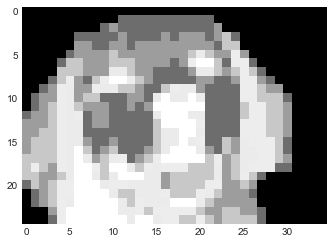